# SIMPLE LOGISTIC REGRESSION

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
log=pd.read_csv(r"C:\Users\WELCOME\Documents\Data Science\Student_performance_new.csv")
log

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,0.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,1.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


# Preprocessing the data

In [2]:
log["GradeClass"].value_counts()

GradeClass
0.0    1211
1.0    1181
Name: count, dtype: int64

In [3]:
log.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

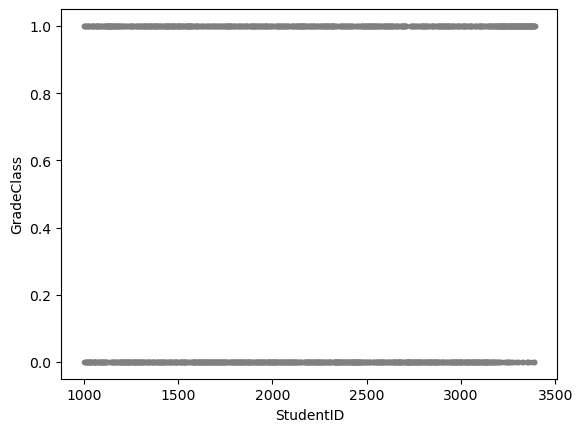

In [4]:
plt.xlabel('StudentID')
plt.ylabel('GradeClass')
plt.scatter(log.StudentID,log.GradeClass,marker='.',color='grey')

# Splitting the data & Calling the Split function

In [5]:
x=log.drop('GradeClass',axis=1)
# x=log[['ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','GPA']]
x.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [6]:
y=log.GradeClass
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: GradeClass, dtype: float64

In [7]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.1)

# Calling Linear Model

In [8]:
reg=linear_model.LogisticRegression()
reg.fit(train_x,train_y)

C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Train & Test Score

In [9]:
reg.score(train_x,train_y)

0.8786610878661087

In [10]:
reg.score(test_x,test_y)

0.887598699489085

In [11]:
# reg.predict_proba(train_x)

In [12]:
train_x.shape

(239, 14)

In [13]:
test_x.shape

(2153, 14)

In [14]:
coef=reg.coef_
coef

array([[ 0.00093565, -0.09004731,  0.11645225,  0.09479166, -0.38399963,
         0.09128826, -0.2749211 ,  0.34297065,  0.7962091 ,  0.21950017,
         0.26380089, -0.03319393, -0.02966047,  0.60725649]])

In [15]:
intr=reg.intercept_
intr

array([-0.0496525])

In [16]:
reg.predict_proba(test_x)

array([[0.09221282, 0.90778718],
       [0.7501457 , 0.2498543 ],
       [0.87412265, 0.12587735],
       ...,
       [0.01459187, 0.98540813],
       [0.0048295 , 0.9951705 ],
       [0.22183962, 0.77816038]])

In [17]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [18]:
def prediction_function(StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA):
    z=coef[0][0]*StudentID+coef[0][1]*Age+coef[0][2]*Gender+coef[0][3]*Ethnicity+coef[0][4]*ParentalEducation+coef[0][5]*StudyTimeWeekly+coef[0][6]*Absences+coef[0][7]*Tutoring+coef[0][8]*ParentalSupport+coef[0][9]*Extracurricular+coef[0][10]*Sports+coef[0][11]*Music+coef[0][12]*Volunteering+coef[0][13]*GPA+intr
    y=sigmoid(z)
    return y

In [21]:
prediction_function(1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2720\1349111734.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.11660187044549591

In [22]:
reg.predict([[1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061]])

C:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])